<a href="https://colab.research.google.com/github/2018007956/HYU/blob/main/Deep_Learning/09_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [3]:

train_dataset = torchvision.datasets.MNIST(root='MNIST_data/',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)
test_dataset = torchvision.datasets.MNIST(root='MNIST_data/',
                                             train=False,
                                             transform=transforms.ToTensor(),
                                             download=True)

batch_size = 128
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [4]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) #input channel, output channel, kernel size, stride, padding
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
    self.fc1 = nn.Linear(64*7*7, 128)
    self.fc2 = nn.Linear(128, 10)
    self.activation = nn.ReLU()
    
  def forward(self, x):
    x = self.pool(self.activation(self.conv1(x)))
    x = self.pool(self.activation(self.conv2(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = self.activation(self.fc1(x))
    x = self.fc2(x)
    return x

In [11]:
model=CNN().to(device)

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
criterion = nn.CrossEntropyLoss()

In [14]:
epochs = 30

train_avg_costs = []
test_avg_costs = []

model.train()
for epoch in range(epochs):
  model.train()
  avg_cost = 0
  total_batch_num = len(train_dataloader)

  for b_x, b_y in train_dataloader:
    logits = model(b_x.to(device)) # forward propagation
    loss = criterion(logits, b_y.to(device)) # get cost

    avg_cost += loss/total_batch_num
    optimizer.zero_grad()
    loss.backward() # backward propagation
    optimizer.step() # update parameters
  train_avg_costs.append(avg_cost.detach().cpu())
  print('Epoch : {} / {}, cost: {}'.format(epoch+1, epochs, avg_cost))

  test_avg_cost=0
  test_total_batch = len(test_dataloader)
  model.eval()
  for b_x, b_y in test_dataloader:
    with torch.no_grad():
      logits = model(b_x.to(device))
      test_loss = criterion(logits, b_y.to(device)) # get cost 
    test_avg_cost += test_loss / test_total_batch 

  test_avg_costs.append(test_avg_cost.detach().cpu())

Epoch : 1 / 30, cost: 0.237680122256279
Epoch : 2 / 30, cost: 0.05507877469062805
Epoch : 3 / 30, cost: 0.03978363424539566
Epoch : 4 / 30, cost: 0.03061564452946186
Epoch : 5 / 30, cost: 0.024288242682814598
Epoch : 6 / 30, cost: 0.018508795648813248
Epoch : 7 / 30, cost: 0.014735416509211063
Epoch : 8 / 30, cost: 0.012062439695000648
Epoch : 9 / 30, cost: 0.010693968273699284
Epoch : 10 / 30, cost: 0.008026999421417713
Epoch : 11 / 30, cost: 0.00824490375816822
Epoch : 12 / 30, cost: 0.006450085435062647
Epoch : 13 / 30, cost: 0.006789954379200935
Epoch : 14 / 30, cost: 0.004085148684680462
Epoch : 15 / 30, cost: 0.0046562692150473595
Epoch : 16 / 30, cost: 0.0053583309054374695
Epoch : 17 / 30, cost: 0.0029083124827593565
Epoch : 18 / 30, cost: 0.00493730278685689
Epoch : 19 / 30, cost: 0.006238835863769054
Epoch : 20 / 30, cost: 0.002028054092079401
Epoch : 21 / 30, cost: 0.0021607063245028257
Epoch : 22 / 30, cost: 0.00128644157666713
Epoch : 23 / 30, cost: 0.0016959228087216616
E

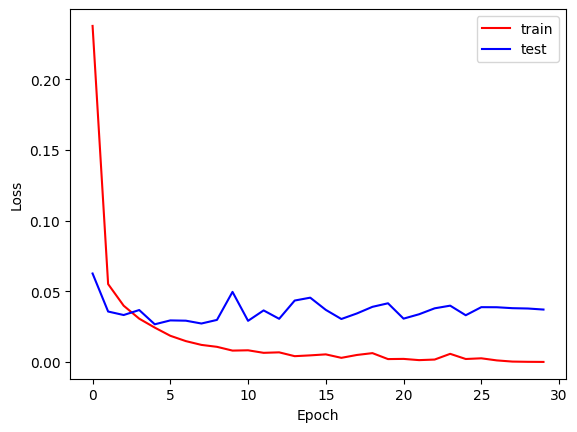

In [15]:
import matplotlib.pyplot as plt
import numpy as np
epoch = range(epochs)
plt.plot(epoch, train_avg_costs, 'r-')
plt.plot(epoch, test_avg_costs, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [16]:
correct = 0
total = 0

model.eval()
for b_x, b_y in test_dataloader:
  with torch.no_grad():
    logits = model(b_x.to(device))

  probs = nn.Softmax(dim=1)(logits)
  predicts = torch.argmax(logits, dim=1)

  total += len(b_y)
  correct += (predicts == b_y.to(device)).sum().item()

print(f'Accuracy of the network on test images: {100*correct//total} %')

Accuracy of the network on test images: 99 %


### 2. CIFAR-10 dataset

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [18]:
train_dataset = torchvision.datasets.CIFAR10(root='CIFAR10/',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)
test_dataset = torchvision.datasets.CIFAR10(root='CIFAR10/',
                                             train=False,
                                             transform=transforms.ToTensor(),
                                             download=True)

batch_size = 128
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

100%|██████████| 170498071/170498071 [00:12<00:00, 13191993.30it/s]


Extracting CIFAR10/cifar-10-python.tar.gz to CIFAR10/
Files already downloaded and verified


In [19]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # input channel, output channel, filter size
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.activation = nn.ReLU()
    
  def forward(self, x):
    x = self.pool(self.activation(self.conv1(x)))
    x = self.pool(self.activation(self.conv2(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = self.activation(self.fc1(x))
    x = self.activation(self.fc2(x))
    x = self.fc3(x)
    return x

In [31]:
model=CNN().to(device)

In [32]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
criterion = nn.CrossEntropyLoss()

In [34]:
epochs = 30
train_avg_costs = []
test_avg_costs = []

model.train()
for epoch in range(epochs):
  model.train()
  avg_cost = 0
  total_batch_num = len(train_dataloader)

  for b_x, b_y in train_dataloader:
    logits = model(b_x.to(device)) # forward propagation
    loss = criterion(logits, b_y.to(device)) # get cost

    avg_cost += loss/total_batch_num
    optimizer.zero_grad()
    loss.backward() # backward propagation
    optimizer.step() # update parameters
  train_avg_costs.append(avg_cost.detach().cpu())
  print('Epoch : {} / {}, cost: {}'.format(epoch+1, epochs, avg_cost))

  test_avg_cost=0
  test_total_batch = len(test_dataloader)
  model.eval()
  for b_x, b_y in test_dataloader:
    with torch.no_grad():
      logits = model(b_x.to(device))
      test_loss = criterion(logits, b_y.to(device)) # get cost 
    test_avg_cost += test_loss / test_total_batch 

  test_avg_costs.append(test_avg_cost.detach().cpu())

Epoch : 1 / 30, cost: 1.9762260913848877
Epoch : 2 / 30, cost: 1.6443061828613281
Epoch : 3 / 30, cost: 1.4978920221328735
Epoch : 4 / 30, cost: 1.3912121057510376
Epoch : 5 / 30, cost: 1.3193658590316772
Epoch : 6 / 30, cost: 1.2433178424835205
Epoch : 7 / 30, cost: 1.1963022947311401
Epoch : 8 / 30, cost: 1.1503740549087524
Epoch : 9 / 30, cost: 1.1174321174621582
Epoch : 10 / 30, cost: 1.0865403413772583
Epoch : 11 / 30, cost: 1.0581938028335571
Epoch : 12 / 30, cost: 1.02865731716156
Epoch : 13 / 30, cost: 1.0032802820205688
Epoch : 14 / 30, cost: 0.981351375579834
Epoch : 15 / 30, cost: 0.9526724815368652
Epoch : 16 / 30, cost: 0.9319174289703369
Epoch : 17 / 30, cost: 0.9116265773773193
Epoch : 18 / 30, cost: 0.8935131430625916
Epoch : 19 / 30, cost: 0.8816999197006226
Epoch : 20 / 30, cost: 0.8589445948600769
Epoch : 21 / 30, cost: 0.8413164615631104
Epoch : 22 / 30, cost: 0.8273653984069824
Epoch : 23 / 30, cost: 0.8112390637397766
Epoch : 24 / 30, cost: 0.7980532646179199
Epoc

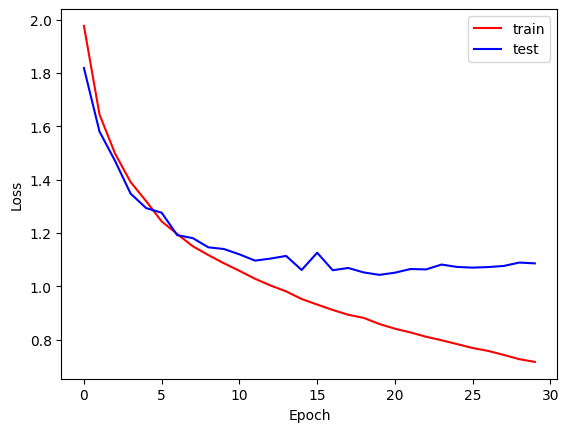

In [35]:
import matplotlib.pyplot as plt
import numpy as np
epoch = range(epochs)
plt.plot(epoch, train_avg_costs, 'r-')
plt.plot(epoch, test_avg_costs, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [36]:
correct = 0
total = 0

model.eval()
for b_x, b_y in test_dataloader:
  with torch.no_grad():
    logits = model(b_x.to(device))

  probs = nn.Softmax(dim=1)(logits)
  predicts = torch.argmax(logits, dim=1)

  total += len(b_y)
  correct += (predicts == b_y.to(device)).sum().item()

print(f'Accuracy of the network on test images: {100*correct//total} %')

Accuracy of the network on test images: 63 %
